<div style="color: white; background-color: darkblue; font-size: 28px; font-weight: bold; text-align: center; padding: 20px;">
PREDICTING STUDENT SUCCESS WITH REGRESSION
</div>

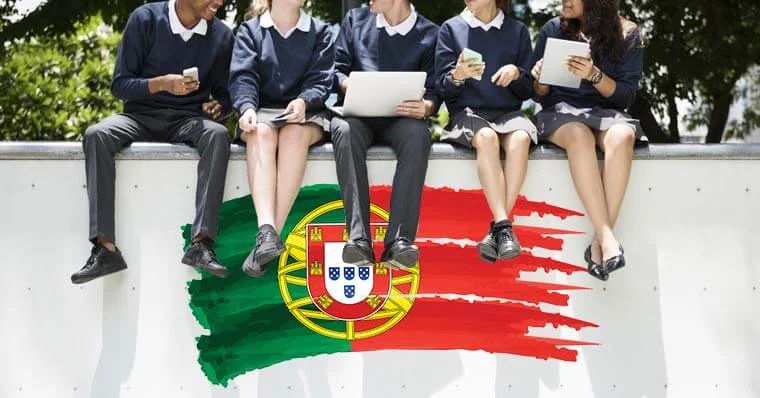!

# PROJECT PROCESS:

* IMPORT LIBARIES 
* DATA LOADING
* DATA CLEANING
* EXPLORATARY DATA ANALYSIS
* GROUP BY
* OUTLIER HANDLING
* ENCODING
* SCALING
* Y-TEST,Y-PRED
* MSE,RMSE,MAE,R2


# IMPORT LIBARIES:

In [11]:
# General-purpose libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For statistical data visualization

# Warning control
import warnings
warnings.filterwarnings("ignore")  # To suppress warnings

# Preprocessing utilities
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import StandardScaler  # For scaling features

# Model selection
from sklearn.model_selection import train_test_split  # For splitting datasets

# Machine learning models
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.linear_model import Ridge # For Ridge regression
from sklearn.linear_model import Lasso # for Lasso regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression
from sklearn.ensemble import GradientBoostingRegressor  # For Gradient Boosting regression
from lightgbm import LGBMRegressor  # For LightGBM regression
from catboost import CatBoostRegressor  # For CatBoost regression
from sklearn.linear_model import ElasticNet  # For ElasticNet regression

# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation metrics

# Tabular data display
from tabulate import tabulate  # For printing tables in a formatted way

# DATA LOADING:

In [13]:
df=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\Student Performance Dataset.csv")

In [14]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# COLUMN DESCRIPTIONS:

# DATA CLEANING PROCESS:

In [17]:
df.shape

(649, 33)

In [18]:
df.size

21417

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         649 non-null    float64
 1   Medu        649 non-null    float64
 2   Fedu        649 non-null    float64
 3   traveltime  649 non-null    float64
 4   studytime   649 non-null    float64
 5   famrel      649 non-null    float64
 6   freetime    649 non-null    float64
 7   goout       649 non-null    float64
 8   Dalc        649 non-null    float64
 9   Walc        649 non-null    float64
 10  health      649 non-null    float64
 11  absences    649 non-null    float64
 12  G2          649 non-null    float64
 13  G3          649 non-null    float64
 14  address     649 non-null    float64
 15  famsize     649 non-null    float64
 16  Pstatus     649 non-null    float64
 17  Mjob        649 non-null    float64
 18  Fjob        649 non-null    float64
 19  reason      649 non-null    f

In [21]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [22]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [23]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("-"*50)
    print("\n")

school
['GP' 'MS']
--------------------------------------------------


sex
['F' 'M']
--------------------------------------------------


age
[18 17 15 16 19 22 20 21]
--------------------------------------------------


address
['U' 'R']
--------------------------------------------------


famsize
['GT3' 'LE3']
--------------------------------------------------


Pstatus
['A' 'T']
--------------------------------------------------


Medu
[4 1 3 2 0]
--------------------------------------------------


Fedu
[4 1 2 3 0]
--------------------------------------------------


Mjob
['at_home' 'health' 'other' 'services' 'teacher']
--------------------------------------------------


Fjob
['teacher' 'other' 'services' 'health' 'at_home']
--------------------------------------------------


reason
['course' 'other' 'home' 'reputation']
--------------------------------------------------


guardian
['mother' 'father' 'other']
--------------------------------------------------


traveltime
[2 1 

In [24]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [27]:
int=df.select_dtypes(include='int')

In [28]:
int

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


# EXPLORATORY DATA ANALYSIS (EDA):

### UNIVARIATE:

##### COUNT PLOT

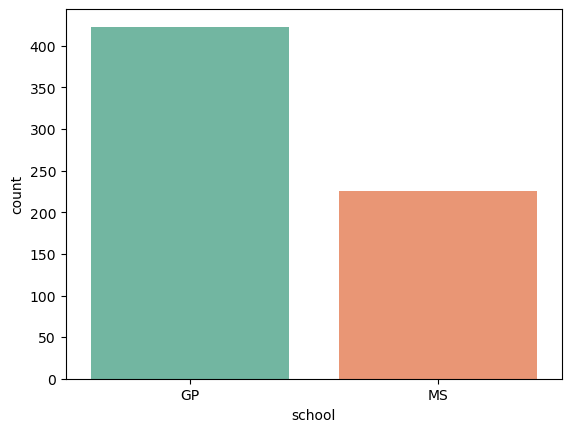

In [32]:
sns.countplot(x="school",data=df,palette='Set2');
plt.show()

* If the bar for GP is much taller than for MS, that means more students in the dataset are from GP.

* This might indicate an imbalance in sample size, which can affect certain analyses (e.g., performance comparisons between schools).



##### HISTOGRAM:

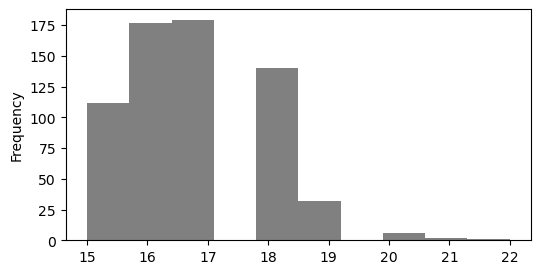

In [35]:
df.age.plot.hist(figsize=(6,3),color="grey");
plt.show()

* Each bar represents the number of students within a specific age (e.g., 15, 16, 17, etc.).

* If the highest bar is at age 17, then age 17 is the most common among the students.

##### DIST PLOT:

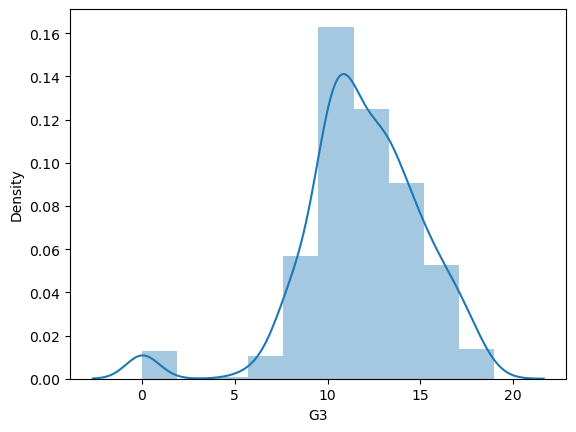

In [38]:
sns.distplot(df['G3'],kde=True,bins=10)
plt.show()

* "Most students scored between 10 and 15 in their final grade (G3), with very few achieving top marks (near 20) or failing completely (near 0). This suggests a moderate performance level across the dataset."



##### Kde Plot:

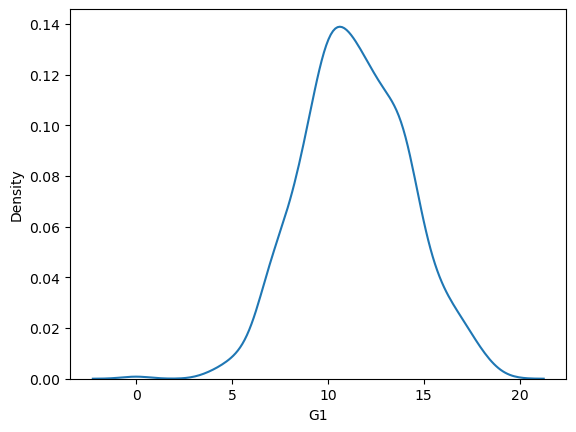

In [41]:
sns.kdeplot(df['G1'])
plt.show()

* "The KDE curve shows that most students scored between 10 and 15 in their first period (G1), with the peak near 12. The distribution is slightly right-skewed, suggesting that some students performed poorly while most were average or better."

##### PIE CHART:

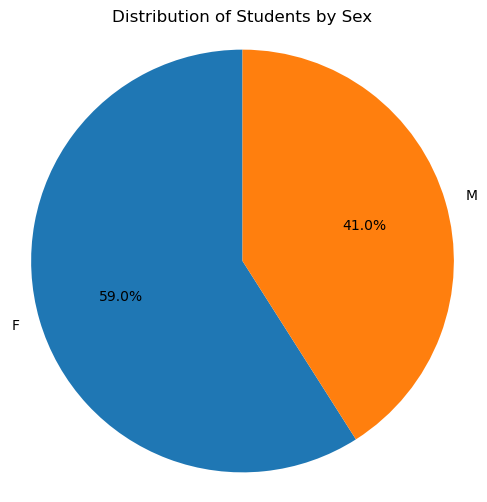

In [44]:
category_counts = df['sex'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Students by Sex')
plt.axis('equal') 
plt.show()

* The dataset contains more female students than male students, with females making up approximately 65% of the total. This gender imbalance should be considered in any comparative performance analysis

## BIVARIATE:

#### BAR PLOT:

In [48]:
def bar_education_balance(a,b):
    sns.set(style="ticks")
    ax=sns.barplot(x=df[a],y=df[b],color='green')
    plt.grid(color='green',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return

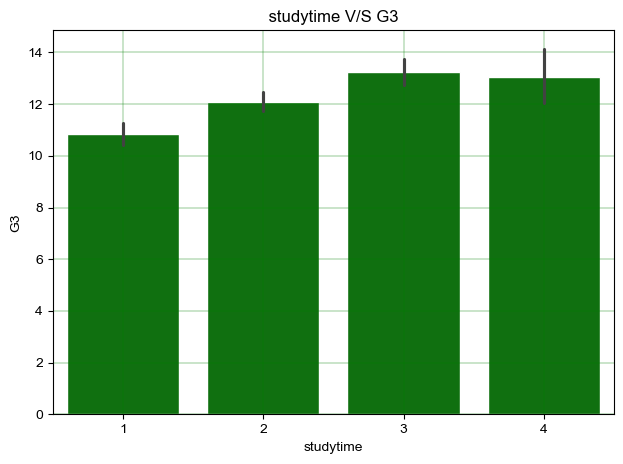

In [49]:
plt.title(" studytime V/S G3 ")
bar_education_balance('studytime','G3')

* Students who study more than 10 hours a week (studytime = 4) tend to have the highest average final grades. Meanwhile, students with less than 2 hours of study (studytime = 1) score the lowest. This suggests a clear positive impact of study time on academic performance.

##### COUNT PLOT:

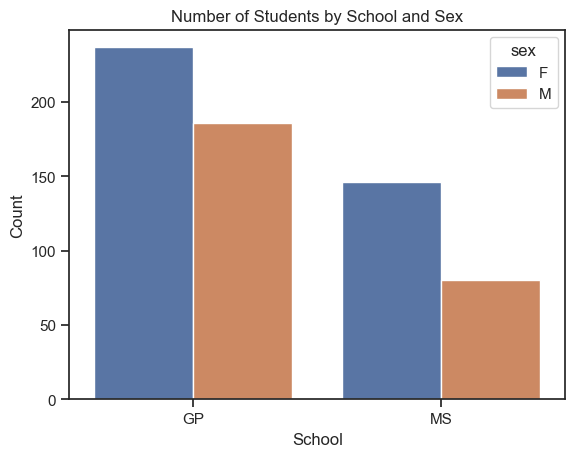

In [52]:
sns.countplot(data=df, x='school', hue='sex')
plt.title('Number of Students by School and Sex')
plt.xlabel('School')
plt.ylabel('Count')
plt.show()

* In Gabriel Pereira (GP), there are significantly more female students than male students. In Mousinho da Silveira (MS), the gender distribution is more balanced. Overall, GP has a higher total number of students than MS.

## MULTIVARIATE:

##### HEATMAP:

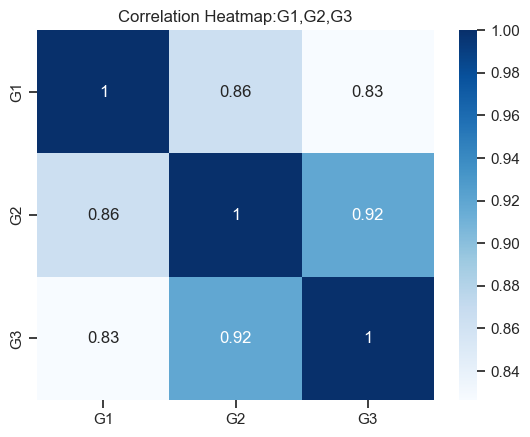

In [56]:
Corr=df[['G1','G2','G3']].corr()
sns.heatmap(Corr,annot=True,cmap='Blues')
plt.title('Correlation Heatmap:G1,G2,G3')
plt.show()


* The heatmap shows a strong positive correlation between all three grades. G2 and G3 have the highest correlation (e.g., 0.95), suggesting that second-period performance is the strongest predictor of final grades. This implies students’ performance remains fairly consistent across terms.

##### DONUT CHART:

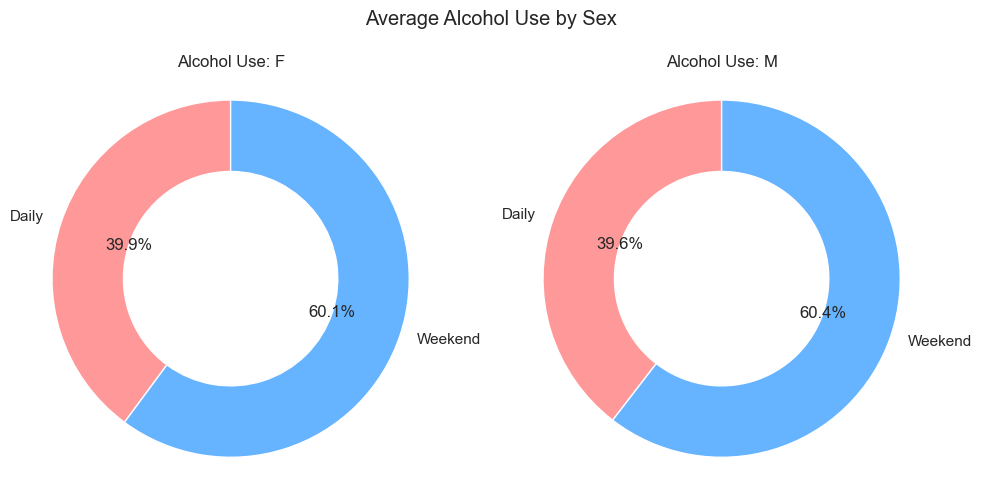

In [59]:
# Count alcohol consumption categories by sex
alc_by_sex = df.groupby('sex')[['Dalc', 'Walc']].mean()

# Donut plot for each sex
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, sex in enumerate(alc_by_sex.index):
    axs[i].pie(
        alc_by_sex.loc[sex],
        labels=['Daily', 'Weekend'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff'],
        wedgeprops={'width':0.4}
    )
    axs[i].set_title(f'Alcohol Use: {sex}')
    axs[i].axis('equal')

plt.suptitle('Average Alcohol Use by Sex')
plt.tight_layout()
plt.show()


* Both male and female students consume significantly more alcohol on weekends than on weekdays. However, males have a slightly higher daily alcohol use compared to females, while weekend consumption is similar or slightly higher in females. This reflects a typical pattern where students drink socially on weekends but some (especially males) may drink more consistently during the week

##### SCATTER PLOT:

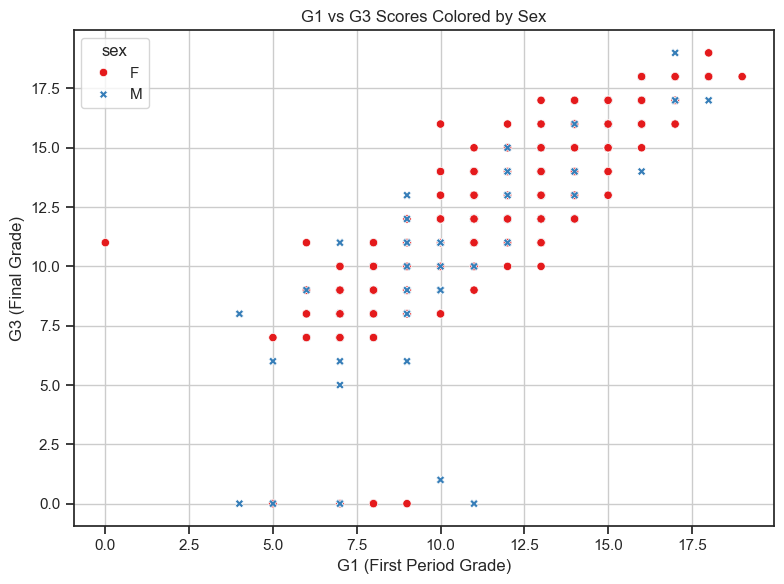

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='G1', y='G3', hue='sex', style='sex', palette='Set1')
plt.title('G1 vs G3 Scores Colored by Sex')
plt.xlabel('G1 (First Period Grade)')
plt.ylabel('G3 (Final Grade)')
plt.grid(True)
plt.tight_layout()
plt.show()

* There is a clear positive relationship between first period grades (G1) and final grades (G3), suggesting that students who start strong tend to finish strong. Both male and female students follow this trend, although female students may show slightly more consistency (less spread), while male students show a wider variation in final grades for the same G1 scores.

##### STACKED BAR CHART:

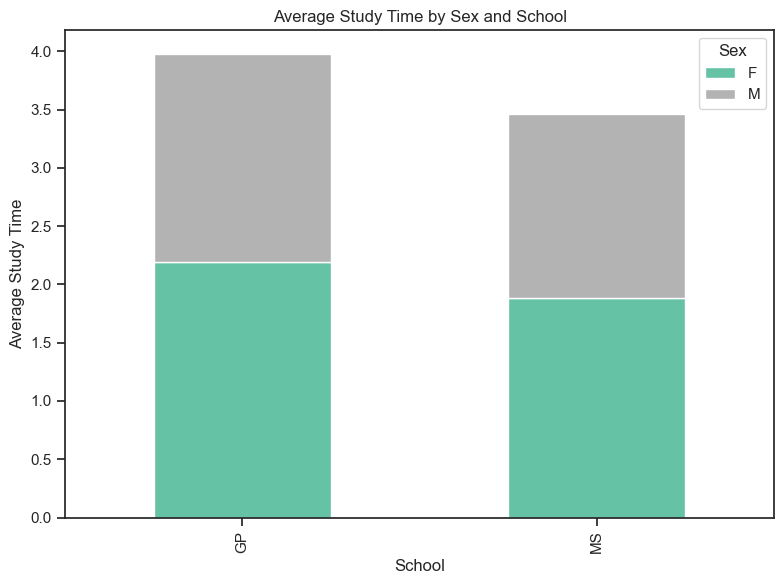

In [65]:
grouped = df.groupby(['school', 'sex'])['studytime'].mean().unstack()

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Average Study Time by Sex and School')
plt.ylabel('Average Study Time')
plt.xlabel('School')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

* At both schools, females tend to have a higher average study time than males. Students from Gabriel Pereira (GP) study more on average than those from Mousinho da Silveira (MS). This suggests that female students, particularly from GP, may be more academically engaged.

# GROUP BY:

In [68]:
age_counts = df.groupby('age').size()
print(age_counts)

age
15    112
16    177
17    179
18    140
19     32
20      6
21      2
22      1
dtype: int64


In [69]:
age_stats = df.groupby('age')[['G1', 'G2', 'G3']].agg(['mean', 'median', 'count'])
print(age_stats)

            G1                      G2                      G3             
          mean median count       mean median count       mean median count
age                                                                        
15   11.758929   12.0   112  11.830357   12.0   112  12.107143   12.0   112
16   11.723164   12.0   177  11.638418   12.0   177  11.994350   12.0   177
17   11.519553   11.0   179  11.849162   12.0   179  12.268156   12.0   179
18   11.200000   11.0   140  11.450000   11.0   140  11.771429   12.0   140
19    9.031250    9.0    32   9.312500   10.0    32   9.531250   10.0    32
20   10.333333   10.5     6  12.000000   11.5     6  12.000000   11.0     6
21    9.000000    9.0     2  11.000000   11.0     2  11.000000   11.0     2
22    7.000000    7.0     1   8.000000    8.0     1   5.000000    5.0     1


# OUTLIER CHECKING:

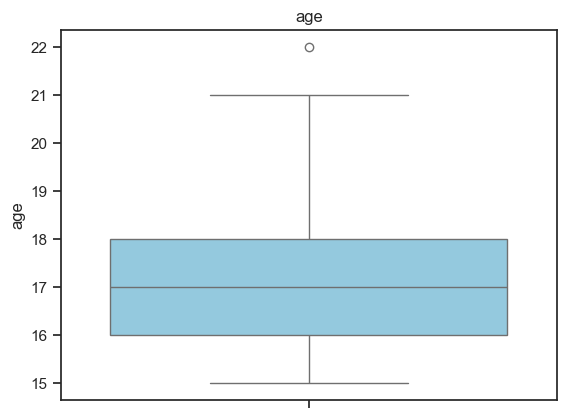

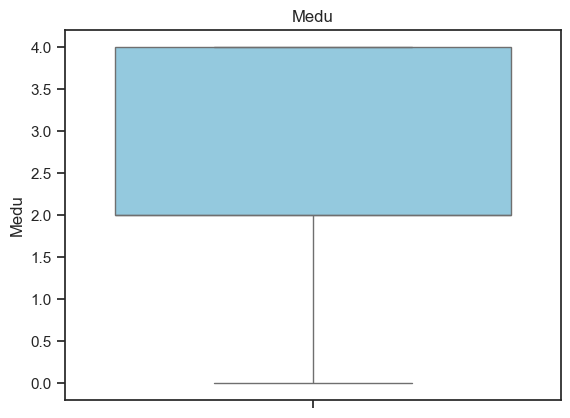

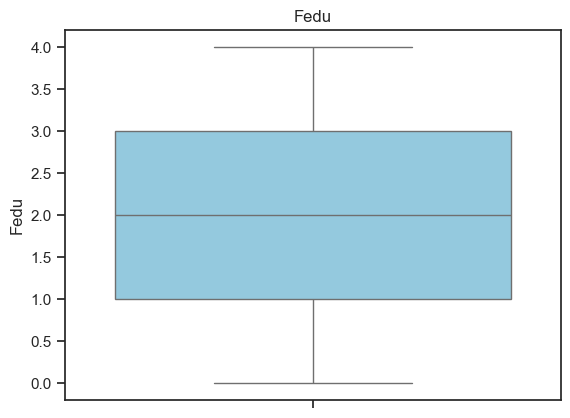

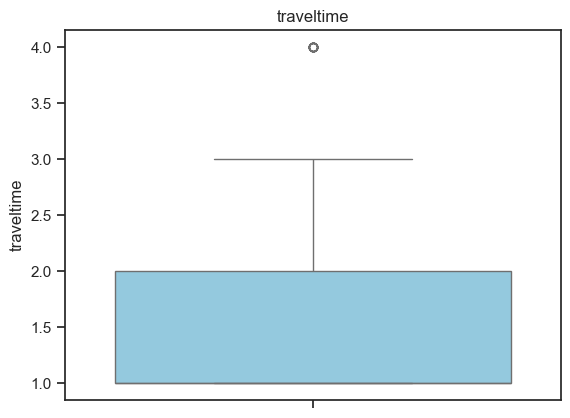

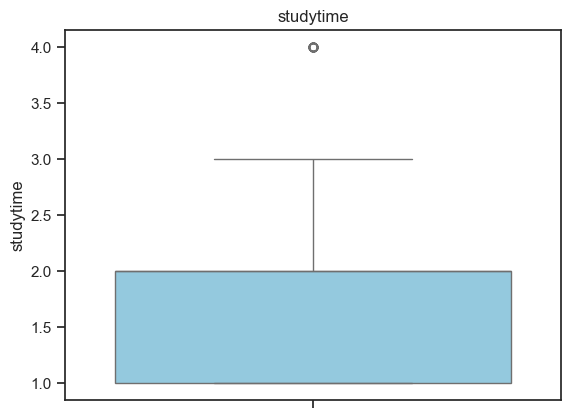

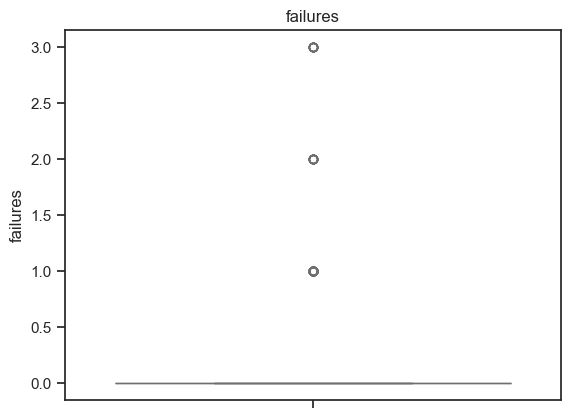

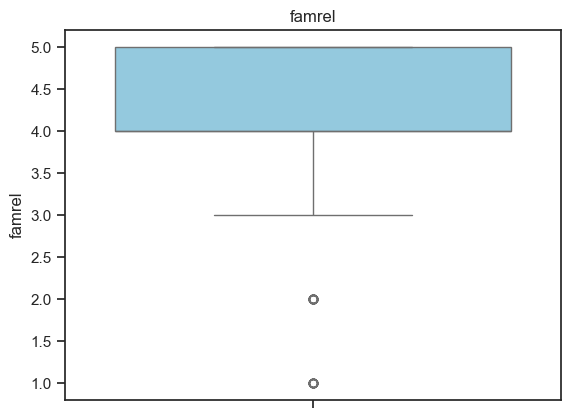

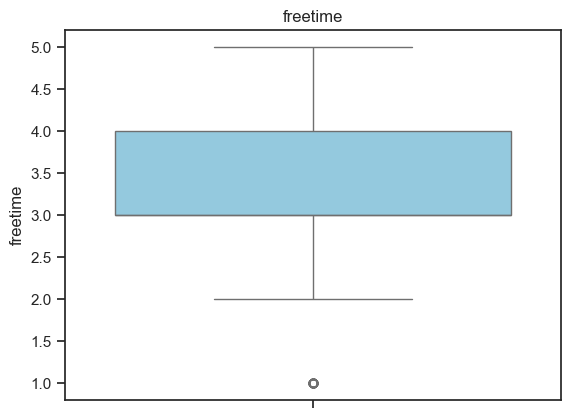

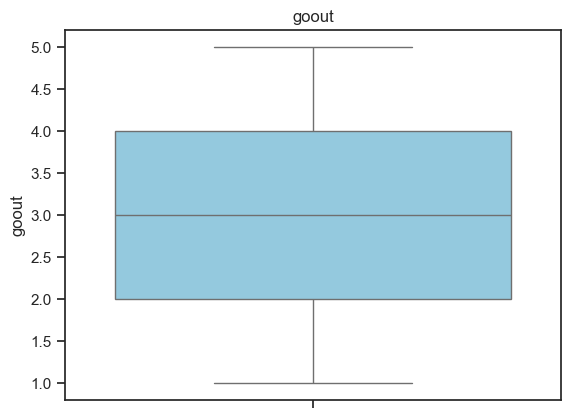

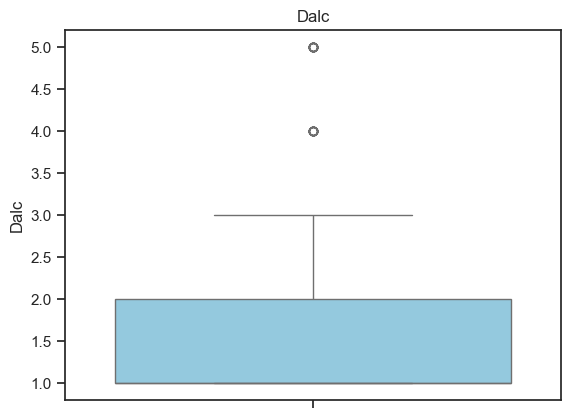

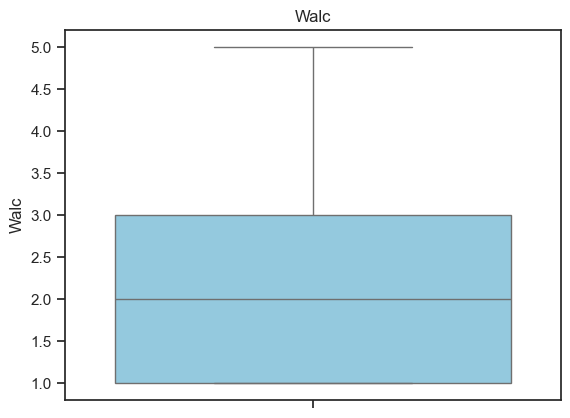

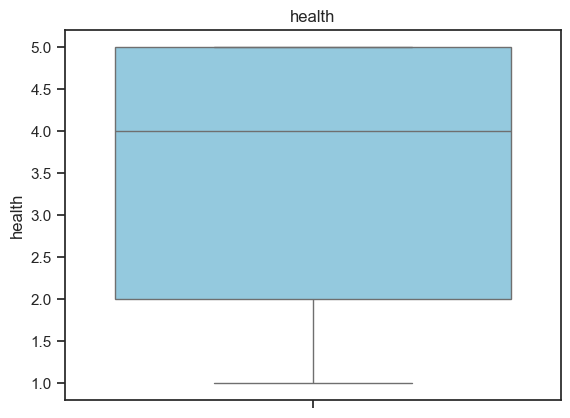

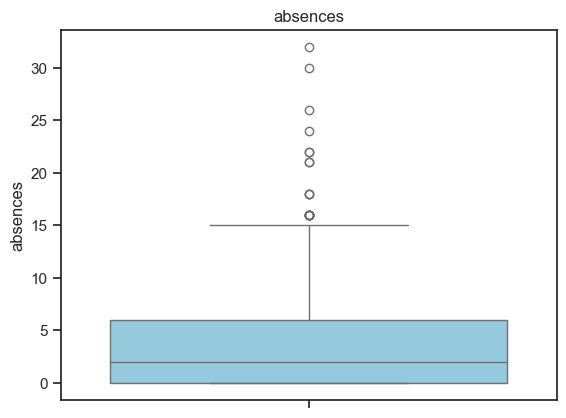

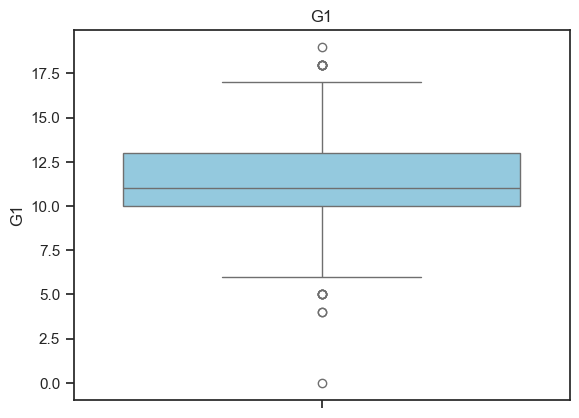

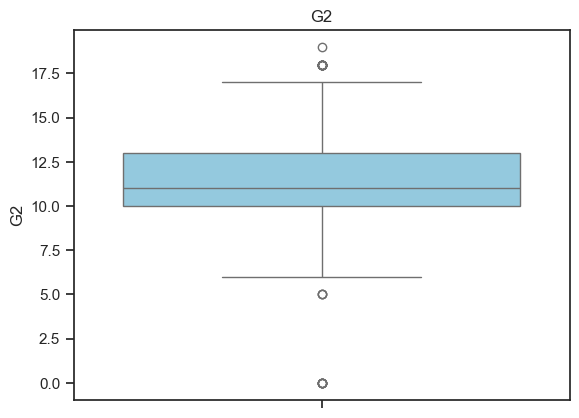

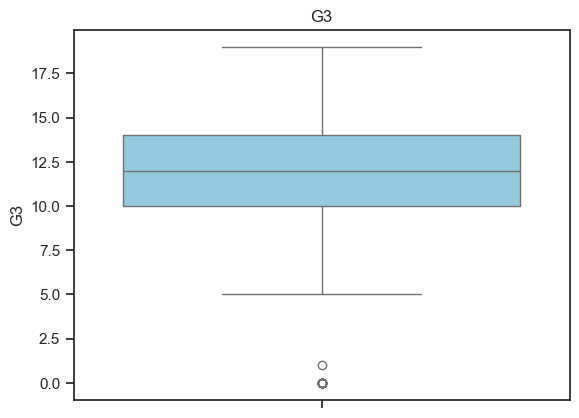

In [71]:
for i in int:
    plt.title(i)  
    sns.boxplot(df[i],color='skyblue')
    plt.show()

# OUTLIER HANDLING:

In [73]:
outlier_cols=['age','traveltime','studytime','failures','famrel','freetime','Dalc','absences','G1','G2','G3']

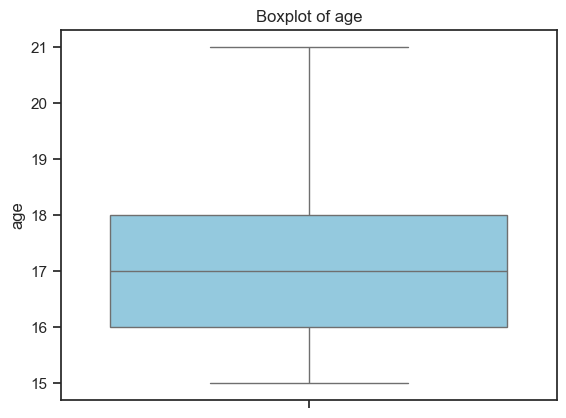

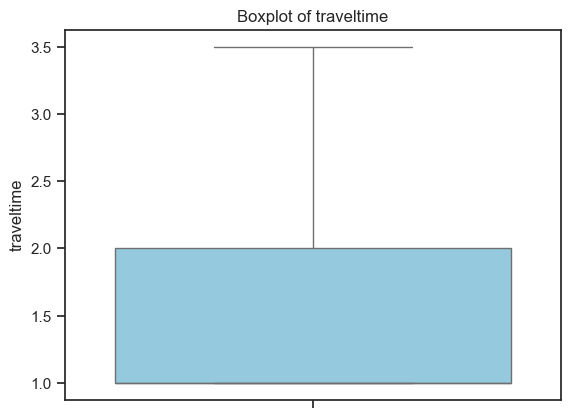

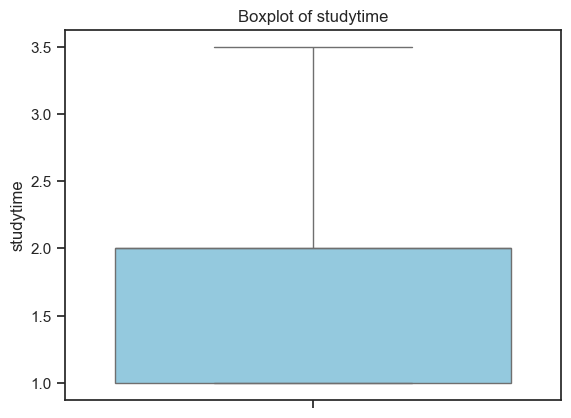

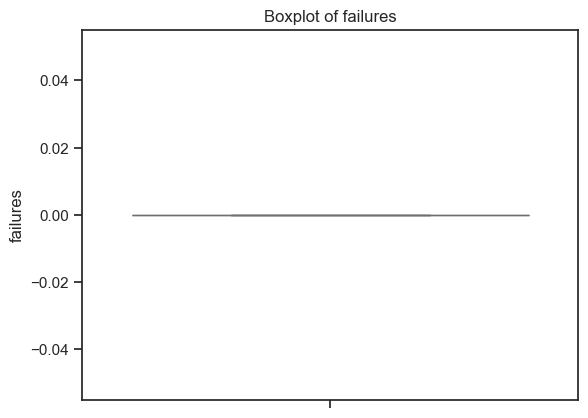

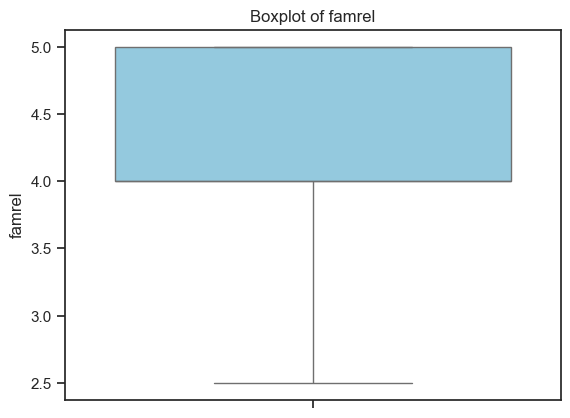

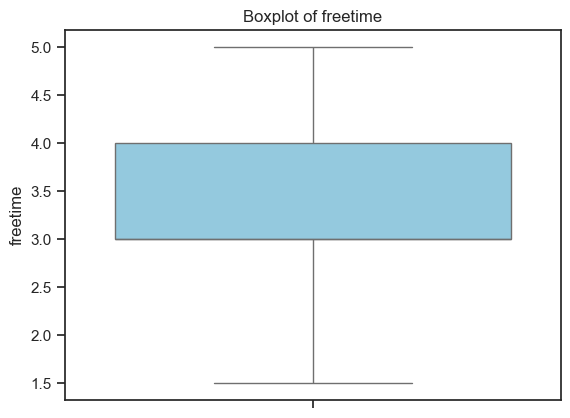

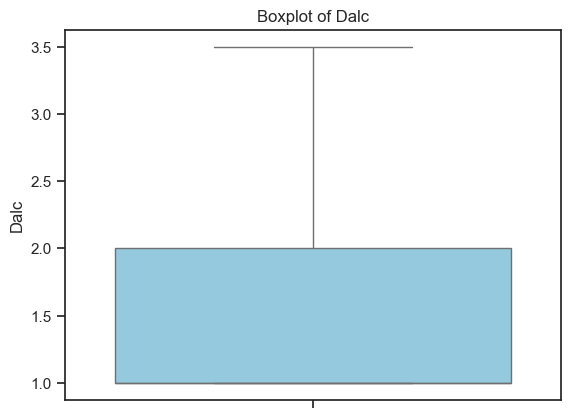

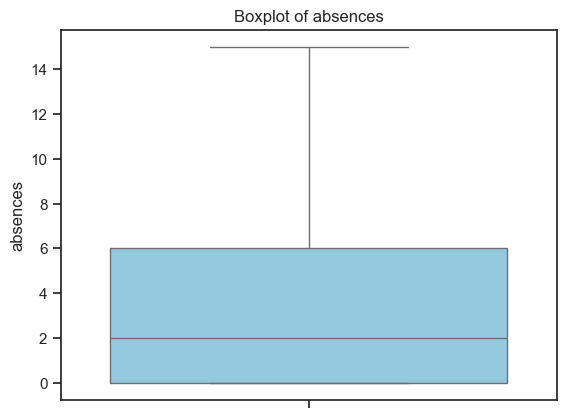

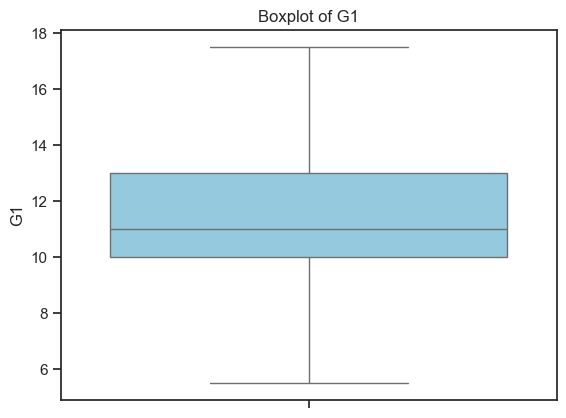

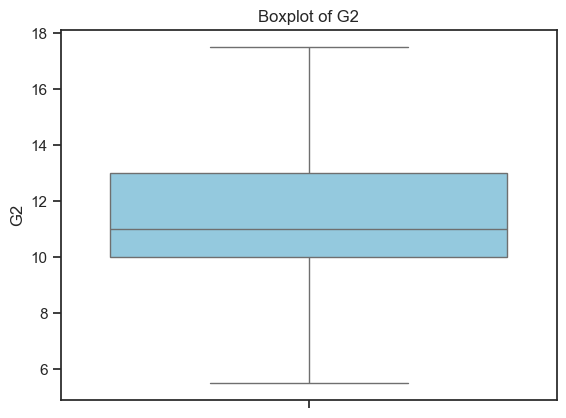

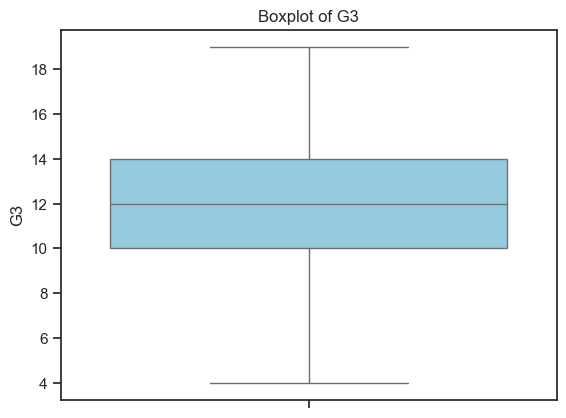

In [74]:
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)  
    sns.boxplot(y=df[col],color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [75]:
int

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [76]:
int=int.drop(['failures'],axis=1)


* After capping, the values in the 'failures' column were changed to 0. Since 'failures' is important for prediction, I decided to drop it.

# FEATURE ENGENEERING:

In [79]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4,1.0,1,3,4,5.5,11.0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3,1.0,1,3,2,9.0,11.0,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2,2.0,3,3,6,12.0,13.0,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3.0,2.0,2,1.0,1,5,0,14.0,14.0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,3.0,2,1.0,2,5,0,11.0,13.0,13


In [80]:
df.school= df.school.replace('GP','Gabriel Pereira')
df.school = df.school.replace('MS ','Mousinho da Silveira')

# replace the School Name column

In [81]:
df.famsize= df.famsize.replace('GT3','>3')
df.famsize = df.famsize.replace('LE3','<=3')

# replace the Famsize column

In [82]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,Gabriel Pereira,F,18,U,>3,A,4,4,at_home,teacher,...,4.0,3.0,4,1.0,1,3,4,5.5,11.0,11
1,Gabriel Pereira,F,17,U,>3,T,1,1,at_home,other,...,5.0,3.0,3,1.0,1,3,2,9.0,11.0,11
2,Gabriel Pereira,F,15,U,<=3,T,1,1,at_home,other,...,4.0,3.0,2,2.0,3,3,6,12.0,13.0,12
3,Gabriel Pereira,F,15,U,>3,T,4,2,health,services,...,3.0,2.0,2,1.0,1,5,0,14.0,14.0,14
4,Gabriel Pereira,F,16,U,>3,T,3,3,other,other,...,4.0,3.0,2,1.0,2,5,0,11.0,13.0,13


# PREPROCESSING:

## ENCODING:

In [85]:
obj=df.select_dtypes(include='object')
obj

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,Gabriel Pereira,F,U,>3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,Gabriel Pereira,F,U,>3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,Gabriel Pereira,F,U,<=3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,Gabriel Pereira,F,U,>3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,Gabriel Pereira,F,U,>3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,>3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,<=3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,>3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,<=3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [86]:
obj.shape

(649, 17)

In [87]:
label_encoder= LabelEncoder()
for i in obj:
    obj[i]=label_encoder.fit_transform(obj[i]) 
obj

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,1,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,0,1,0,2,2,1,1,0,0,0,1,1,1,0
3,0,0,1,1,1,1,3,1,1,0,1,0,1,1,1,1,1
4,0,0,1,1,1,2,2,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0,1,1,3,2,0,1,0,0,0,1,0,1,1,0
645,1,0,1,0,1,4,3,0,1,0,1,0,0,1,1,1,0
646,1,0,1,1,1,2,2,0,1,0,0,0,1,1,1,0,0
647,1,1,1,0,1,3,3,0,1,0,0,0,0,0,1,1,0


In [88]:
df=df.drop(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2','G3'],axis=1)

In [89]:
obj

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,1,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,0,1,0,2,2,1,1,0,0,0,1,1,1,0
3,0,0,1,1,1,1,3,1,1,0,1,0,1,1,1,1,1
4,0,0,1,1,1,2,2,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0,1,1,3,2,0,1,0,0,0,1,0,1,1,0
645,1,0,1,0,1,4,3,0,1,0,1,0,0,1,1,1,0
646,1,0,1,1,1,2,2,0,1,0,0,0,1,1,1,0,0
647,1,1,1,0,1,3,3,0,1,0,0,0,0,0,1,1,0


In [90]:
int

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,2,4,5,3,4,2,6,10,10,10


In [91]:
df

,failures
0,0
1,0
2,0
3,0
4,0
...,...
644,0
645,0
646,0
647,0


In [92]:
df=pd.concat([int,obj,df],axis=1)

In [93]:
df.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,failures
0,18,4,4,2,2,4,3,4,1,1,...,1,1,0,0,0,1,1,0,0,0
1,17,1,1,1,2,5,3,3,1,1,...,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,4,3,2,2,3,...,1,1,0,0,0,1,1,1,0,0
3,15,4,2,1,3,3,2,2,1,1,...,1,0,1,0,1,1,1,1,1,0
4,16,3,3,1,2,4,3,2,1,2,...,0,0,1,0,0,1,1,0,0,0


In [94]:
df.tail()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,failures
644,19,2,3,1,3,5,4,2,1,2,...,1,0,0,0,1,0,1,1,0,0
645,18,3,1,1,2,4,3,4,1,1,...,1,0,1,0,0,1,1,1,0,0
646,18,1,1,2,2,1,1,1,1,1,...,1,0,0,0,1,1,1,0,0,0
647,17,3,1,2,1,2,4,5,3,4,...,1,0,0,0,0,0,1,1,0,0
648,18,3,2,3,1,4,4,1,3,4,...,1,0,0,0,0,0,1,1,0,0


In [95]:
sum(df.duplicated(df.columns))

0

In [96]:
df.isna().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
failures      0
dtype: int64

In [97]:
df=df.drop(['guardian','sex','school','G1'],axis=1)

# SCALING:

In [99]:
from sklearn.preprocessing import StandardScaler
# Create scaler
scaler = StandardScaler()

# Fit and transform
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

In [100]:
df

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,reason,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,failures
0,1.031695,1.310216,1.540715,0.576718,0.083653,0.072606,-0.171647,0.693785,-0.543555,-0.997695,...,-0.933974,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496,0.0
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,...,-0.933974,-0.342110,0.794137,-0.252853,-0.971140,-2.017502,0.344914,0.550648,-0.763496,0.0
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,0.072606,-0.171647,-1.008546,0.538553,0.560678,...,0.745109,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,0.550648,-0.763496,0.0
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,...,-0.094432,-0.342110,0.794137,-0.252853,1.029717,0.495663,0.344914,0.550648,1.309764,0.0
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,...,-0.094432,-0.342110,0.794137,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.119748,0.780478,-1.008546,-0.543555,-0.218508,...,-0.933974,-0.342110,-1.259229,-0.252853,1.029717,-2.017502,0.344914,0.550648,-0.763496,0.0
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,0.072606,-0.171647,0.693785,-0.543555,-0.997695,...,-0.933974,-0.342110,0.794137,-0.252853,-0.971140,0.495663,0.344914,0.550648,-0.763496,0.0
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-3.068820,-2.075896,-1.859711,-0.543555,-0.997695,...,-0.933974,-0.342110,-1.259229,-0.252853,1.029717,0.495663,0.344914,-1.816043,-0.763496,0.0
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-2.021678,0.780478,1.544950,1.620662,1.339864,...,-0.933974,-0.342110,-1.259229,-0.252853,-0.971140,-2.017502,0.344914,0.550648,-0.763496,0.0


In [101]:
x=df.drop(['G3'], axis=1)
y=df['G3']

In [102]:
x

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,reason,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,failures
0,1.031695,1.310216,1.540715,0.576718,0.083653,0.072606,-0.171647,0.693785,-0.543555,-0.997695,...,-0.933974,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496,0.0
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,...,-0.933974,-0.342110,0.794137,-0.252853,-0.971140,-2.017502,0.344914,0.550648,-0.763496,0.0
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,0.072606,-0.171647,-1.008546,0.538553,0.560678,...,0.745109,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,0.550648,-0.763496,0.0
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,...,-0.094432,-0.342110,0.794137,-0.252853,1.029717,0.495663,0.344914,0.550648,1.309764,0.0
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,...,-0.094432,-0.342110,0.794137,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.119748,0.780478,-1.008546,-0.543555,-0.218508,...,-0.933974,-0.342110,-1.259229,-0.252853,1.029717,-2.017502,0.344914,0.550648,-0.763496,0.0
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,0.072606,-0.171647,0.693785,-0.543555,-0.997695,...,-0.933974,-0.342110,0.794137,-0.252853,-0.971140,0.495663,0.344914,0.550648,-0.763496,0.0
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-3.068820,-2.075896,-1.859711,-0.543555,-0.997695,...,-0.933974,-0.342110,-1.259229,-0.252853,1.029717,0.495663,0.344914,-1.816043,-0.763496,0.0
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-2.021678,0.780478,1.544950,1.620662,1.339864,...,-0.933974,-0.342110,-1.259229,-0.252853,-0.971140,-2.017502,0.344914,0.550648,-0.763496,0.0


In [103]:
y

0     -0.280658
1     -0.280658
2      0.029116
3      0.648663
4      0.338889
         ...   
644   -0.590431
645    1.268209
646   -0.900204
647   -0.590431
648   -0.280658
Name: G3, Length: 649, dtype: float64

# Test&Train:

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### LINEAR REGRESSION

In [107]:
lr = LinearRegression() 
lr_model = lr.fit(x_train, y_train) 
lr_pred = lr_model.predict(x_test) 
lr_mse=mean_squared_error(y_test, lr_pred) 
lr_r2score=(r2_score(y_test, lr_pred)*100)
print(f"MSE:{lr_mse:.6f}")
print(f"R² Score:{lr_r2score:.2f}%")

MSE:0.131202
R² Score:87.64%


### RIDGE REGRESSION

In [109]:
ridge = Ridge(alpha=1.0) 
ridge_model = ridge.fit(x_train, y_train) 
ridge_pred = ridge_model.predict(x_test) 
ridge_mse= mean_squared_error(y_test, ridge_pred)
ridge_r2score=(r2_score(y_test, ridge_pred)*100)
print(f"MSE:{ridge_mse:.6f}")
print(f"R² Score:{ridge_r2score:.2f}%")

MSE:0.130833
R² Score:87.67%


### LASSO REGRESSION

In [111]:
Lasso = Lasso(alpha=0.1)
Lasso_model = Lasso.fit(x_train, y_train) 
Lasso_pred = Lasso_model.predict(x_test) 
Lasso_mse= mean_squared_error(y_test, Lasso_pred)
Lasso_r2score=(r2_score(y_test, Lasso_pred)*100)
print(f"MSE:{Lasso_mse:.6f}")
print(f"R² Score:{Lasso_r2score:.2f}%")

MSE:0.124286
R² Score:88.29%


### RANDOM FOREST REGRESSOR

In [113]:
rfr = RandomForestRegressor() 
rfr_model = rfr.fit(x_train, y_train) 
rfr_pred = rfr_model.predict(x_test) 
rfr_mse= mean_squared_error(y_test, rfr_pred)
rfr_r2score=(r2_score(y_test, rfr_pred)*100)
print(f"MSE:{rfr_mse:.6f}")
print(f"R² Score:{rfr_r2score:.2f}%")

MSE:0.153441
R² Score:85.54%


### GRADIENTBOOSTING REGRESSOR

In [115]:
gbr = GradientBoostingRegressor() 
gbr_model = gbr.fit(x_train, y_train) 
gbr_pred = gbr_model.predict(x_test) 
gbr_mse= mean_squared_error(y_test, gbr_pred)
gbr_r2score=(r2_score(y_test, gbr_pred)*100)
print(f"MSE:{gbr_mse:.6f}")
print(f"R² Score:{gbr_r2score:.2f}%")

MSE:0.146120
R² Score:86.23%


### LGBM REGRESSOR

In [117]:
lgbmr = LGBMRegressor(verbosity=-1) 
lgbmr_model = lgbmr.fit(x_train, y_train) 
lgbmr_pred = lgbmr_model.predict(x_test) 
lgbmr_mse= mean_squared_error(y_test, lgbmr_pred)
lgbmr_r2score=(r2_score(y_test, lgbmr_pred)*100)
print(f"MSE:{lgbmr_mse:.6f}")
print(f"R² Score:{lgbmr_r2score:.2f}%")

MSE:0.158472
R² Score:85.07%


  File "C:\Users\GCE PMNA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


### CATBOOST REGRESSOR

In [119]:
catr = CatBoostRegressor(verbose=0) 
catr_model = catr.fit(x_train, y_train) 
catr_pred = catr_model.predict(x_test) 
catr_mse= mean_squared_error(y_test, catr_pred)
catr_r2score=(r2_score(y_test, catr_pred)*100)
print(f"MSE:{catr_mse:.6f}")
print(f"R² Score:{catr_r2score:.2f}%")

MSE:0.140227
R² Score:86.79%


### ELASTIC NET REGRESSOR

In [121]:
elastic=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model = elastic.fit(x_train, y_train)
elastic_pred = elastic_model.predict(x_test) 
elastic_mse= mean_squared_error(y_test, elastic_pred)
elastic_r2score=(r2_score(y_test, elastic_pred)*100)
print(f"MSE:{elastic_mse:.6f}")
print(f"R² Score:{elastic_r2score:.2f}%")

MSE:0.122753
R² Score:88.43%


In [122]:
RMSE=np.sqrt(mean_squared_error(y_test,Lasso_pred ))
MAE=mean_absolute_error(y_test, Lasso_pred)
print(f"MSE:{lr_mse:.6f}")
print(f"RMSE:{RMSE:.6f}")
print(f"MAE:{MAE:.6f}")
print(f"R² Score:{lr_r2score:.2f}%")

# Using Lasso regression

MSE:0.131202
RMSE:0.352542
MAE:0.214588
R² Score:87.64%
